In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para dividir datos y entrenar el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Cargamos el dataset 
rutas = [
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\car details v4.csv",
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\car data.csv",
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\CAR DETAILS FROM CAR DEKHO.csv",
    r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 2 - Dataset Vehicle\Car details v3.csv"
]

# Leer y combinar los archivos
dataframes = [pd.read_csv(ruta) for ruta in rutas]  # Cargar cada archivo en un DataFrame
data = pd.concat(dataframes, ignore_index=True, sort=False)  # Combinar todos los DataFrames

In [78]:
# Realizamos lectura de los Datos para el análisis exploratorio
# Rellenar valores faltantes con 0 o algún valor específico
data.fillna(0, inplace=True)
data.head(40)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Honda,Amaze 1.2 VX i-VTEC,505000.0,2017.0,87150.0,Petrol,Manual,Pune,Grey,First,...,0.0,0,0,0,0,0,0,0,0,0.0
1,Maruti Suzuki,Swift DZire VDI,450000.0,2014.0,75000.0,Diesel,Manual,Ludhiana,White,Second,...,0.0,0,0,0,0,0,0,0,0,0.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000.0,2011.0,67000.0,Petrol,Manual,Lucknow,Maroon,First,...,0.0,0,0,0,0,0,0,0,0,0.0
3,Toyota,Glanza G,799000.0,2019.0,37500.0,Petrol,Manual,Mangalore,Red,First,...,0.0,0,0,0,0,0,0,0,0,0.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000.0,2018.0,69000.0,Diesel,Manual,Mumbai,Grey,First,...,0.0,0,0,0,0,0,0,0,0,0.0
5,Maruti Suzuki,Ciaz ZXi,675000.0,2017.0,73315.0,Petrol,Manual,Pune,Grey,First,...,0.0,0,0,0,0,0,0,0,0,0.0
6,Mercedes-Benz,CLA 200 Petrol Sport,1898999.0,2015.0,47000.0,Petrol,Automatic,Mumbai,White,Second,...,0.0,0,0,0,0,0,0,0,0,0.0
7,BMW,X1 xDrive20d M Sport,2650000.0,2017.0,75000.0,Diesel,Automatic,Coimbatore,White,Second,...,0.0,0,0,0,0,0,0,0,0,0.0
8,Skoda,Octavia 1.8 TSI Style Plus AT [2017],1390000.0,2017.0,56000.0,Petrol,Automatic,Mumbai,White,First,...,0.0,0,0,0,0,0,0,0,0,0.0
9,Nissan,Terrano XL (D),575000.0,2015.0,85000.0,Diesel,Manual,Mumbai,White,First,...,0.0,0,0,0,0,0,0,0,0,0.0


In [58]:
# Exploración de datos
print(data.head())

            Make                            Model      Price    Year  \
0          Honda              Amaze 1.2 VX i-VTEC   505000.0  2017.0   
1  Maruti Suzuki                  Swift DZire VDI   450000.0  2014.0   
2        Hyundai             i10 Magna 1.2 Kappa2   220000.0  2011.0   
3         Toyota                         Glanza G   799000.0  2019.0   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000.0  2018.0   

   Kilometer Fuel Type Transmission   Location   Color   Owner  ... km_driven  \
0    87150.0    Petrol       Manual       Pune    Grey   First  ...       NaN   
1    75000.0    Diesel       Manual   Ludhiana   White  Second  ...       NaN   
2    67000.0    Petrol       Manual    Lucknow  Maroon   First  ...       NaN   
3    37500.0    Petrol       Manual  Mangalore     Red   First  ...       NaN   
4    69000.0    Diesel       Manual     Mumbai    Grey   First  ...       NaN   

  fuel seller_type transmission owner  mileage  engine  max_power  torque  \
0  

In [60]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   float64
 3   Year                2360 non-null   float64
 4   Kilometer           2059 non-null   float64
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2360 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2360 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Widt

In [118]:
# Eliminar filas con valores nulos en columnas relevantes
data = data.dropna(subset=['Selling_Price', 'Present_Price'])

In [120]:
# Comprobar valores nulos
print(data.isnull().sum())

Price                      0
Year                       0
Kilometer                  0
Length                     0
Width                      0
                          ..
torque_99.04Nm@ 4500rpm    0
torque_99.07Nm@ 4500rpm    0
torque_99.1Nm@ 4500rpm     0
torque_99.8Nm@ 2700rpm     0
torque_99Nm@ 4500rpm       0
Length: 5856, dtype: int64


In [124]:
print(data.describe())

              Price          Year     Kilometer        Length         Width  \
count  1.482800e+04  14828.000000  1.482800e+04  14828.000000  14828.000000   
mean   2.364756e+05    320.874157  7.529585e+03    575.958794    237.870515   
std    1.076853e+06    737.551806  2.843105e+04   1469.810420    605.356068   
min    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000   
25%    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000   
50%    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000   
75%    0.000000e+00      0.000000  0.000000e+00      0.000000      0.000000   
max    3.500000e+07   2022.000000  2.000000e+06   5569.000000   2220.000000   

             Height  Seating Capacity  Fuel Tank Capacity  Selling_Price  \
count  14828.000000      14828.000000        14828.000000   14828.000000   
mean     214.156461          0.713920            6.824676       0.094622   
std      545.460762          1.835673           18.392757   

In [128]:
# Identificar variables categóricas y numéricas
print(data.select_dtypes(include=['object']).columns)

Index([], dtype='object')


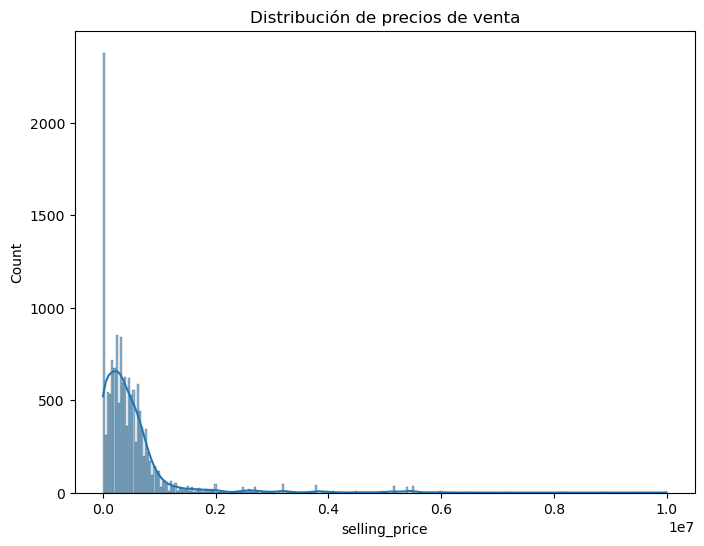

In [130]:
# Distribución de precios de venta
plt.figure(figsize=(8, 6))
sns.histplot(data['selling_price'], kde=True)
plt.title('Distribución de precios de venta')
plt.show()

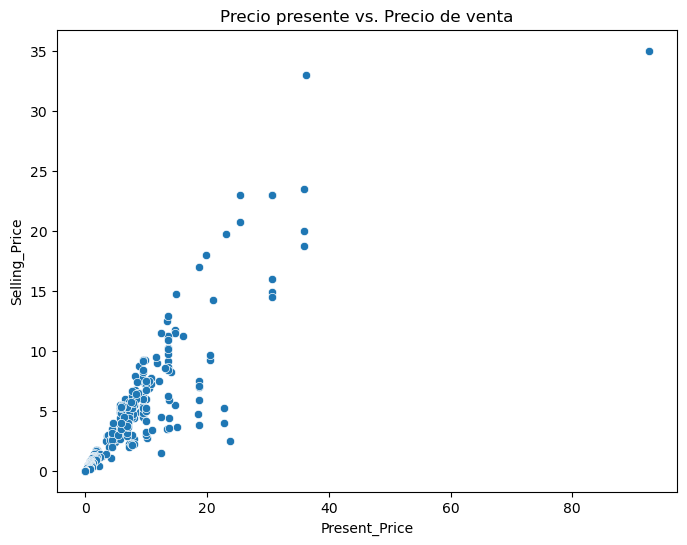

In [132]:
# Relación entre el precio presente y el precio de venta
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Precio presente vs. Precio de venta')
plt.show()

In [134]:
# Eliminar valores faltantes si existen
data.dropna(inplace=True)

In [136]:
# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)

In [138]:
# Ver los datos después de preprocesar
print(data.head())

       Price    Year  Kilometer  Length   Width  Height  Seating Capacity  \
0   505000.0  2017.0    87150.0  3990.0  1680.0  1505.0               5.0   
1   450000.0  2014.0    75000.0  3995.0  1695.0  1555.0               5.0   
2   220000.0  2011.0    67000.0  3585.0  1595.0  1550.0               5.0   
3   799000.0  2019.0    37500.0  3995.0  1745.0  1510.0               5.0   
4  1950000.0  2018.0    69000.0  4735.0  1830.0  1795.0               7.0   

   Fuel Tank Capacity  Selling_Price  Present_Price  ...  \
0                35.0            0.0            0.0  ...   
1                42.0            0.0            0.0  ...   
2                35.0            0.0            0.0  ...   
3                37.0            0.0            0.0  ...   
4                55.0            0.0            0.0  ...   

   torque_96.1Nm@ 3000rpm  torque_96Nm@ 2500rpm  torque_96Nm@ 3000rpm  \
0                   False                 False                 False   
1                   False     

       Price    Year  Kilometer  Length   Width  Height  Seating Capacity  \
0   505000.0  2017.0    87150.0  3990.0  1680.0  1505.0               5.0   
1   450000.0  2014.0    75000.0  3995.0  1695.0  1555.0               5.0   
2   220000.0  2011.0    67000.0  3585.0  1595.0  1550.0               5.0   
3   799000.0  2019.0    37500.0  3995.0  1745.0  1510.0               5.0   
4  1950000.0  2018.0    69000.0  4735.0  1830.0  1795.0               7.0   

   Fuel Tank Capacity  Selling_Price  Present_Price  Kms_Driven  year  \
0                35.0            0.0            0.0         0.0   0.0   
1                42.0            0.0            0.0         0.0   0.0   
2                35.0            0.0            0.0         0.0   0.0   
3                37.0            0.0            0.0         0.0   0.0   
4                55.0            0.0            0.0         0.0   0.0   

   selling_price  km_driven  seats  
0            0.0        0.0    0.0  
1            0.0        

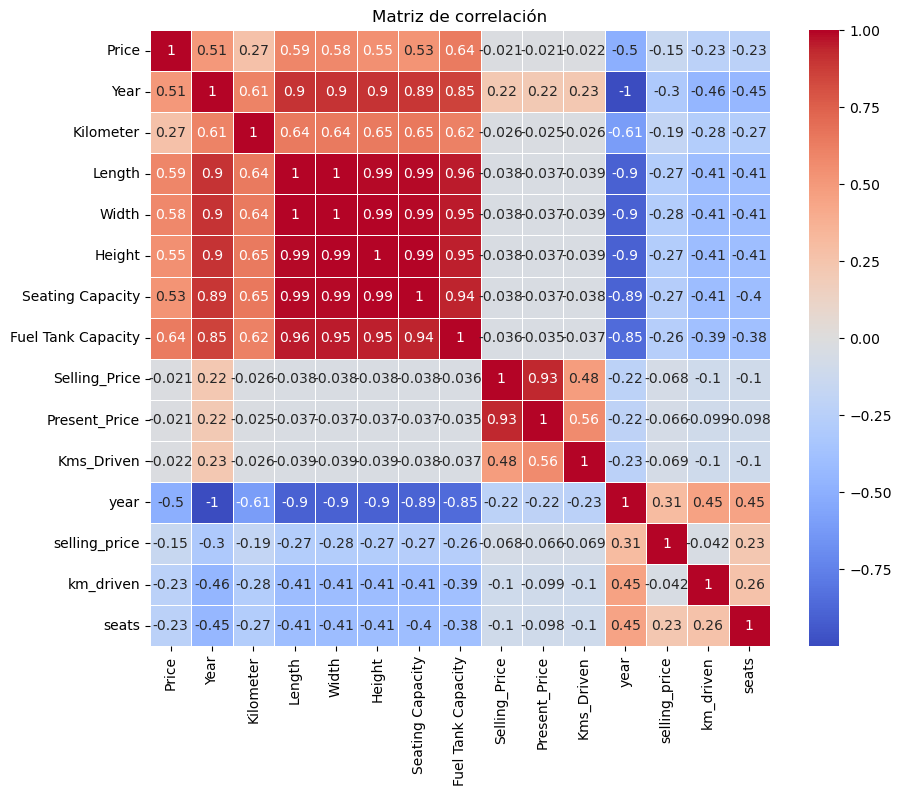

In [140]:
# Matriz de correlación
# Filtrar solo las columnas numéricas para la matriz de correlación
data_numeric = data.select_dtypes(include=[np.number])

# Verificar que solo hay datos numéricos
print(data_numeric.head())

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [142]:
# Selección de las variables independientes y dependientes
X = data.drop(['Selling_Price'], axis=1)  # Variables independientes
y = data['Selling_Price']  # Variable dependiente

In [144]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (10379, 5855)
Tamaño del conjunto de prueba: (4449, 5855)


In [146]:
# Inicializar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Coeficientes del modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficientes: [-4.67844605e-07  2.69934802e-01  6.22425244e-07 ...  1.37183655e+00
 -7.20840432e-02 -2.35893365e-01]
Intercepto: -333.67167544827976


In [150]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [152]:
# Cálculo de métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 14.582365001773677
R²: -187.03681889244677


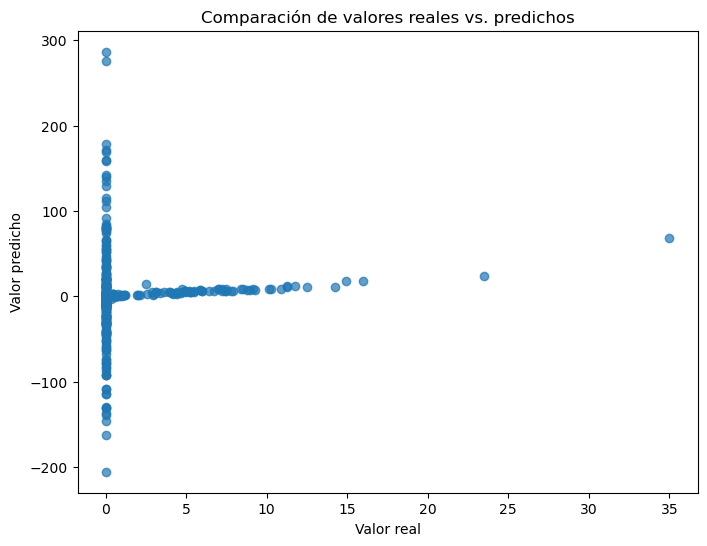

In [154]:
# Comparación entre valores reales y predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Comparación de valores reales vs. predichos')
plt.show()

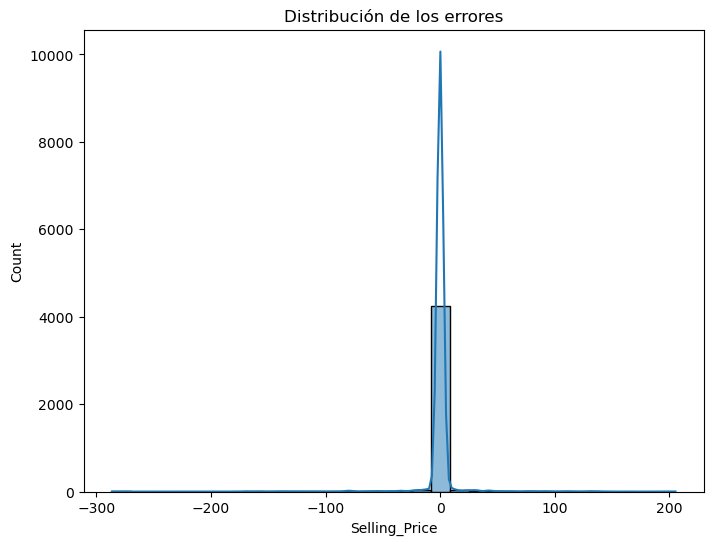

In [156]:
# Histograma de errores
error = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(error, bins=30, kde=True)
plt.title('Distribución de los errores')
plt.show()

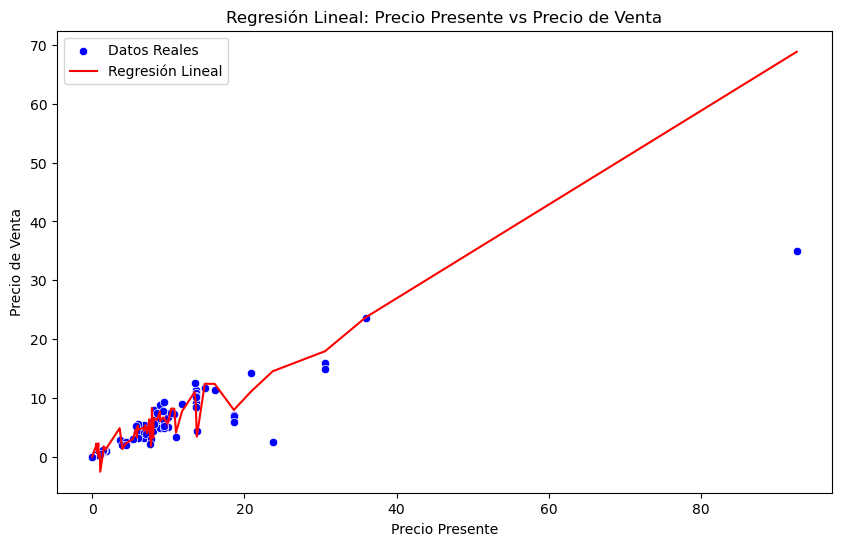

In [158]:
# Gráfico de regresión lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Present_Price'], y=y_test, color='blue', label='Datos Reales')
sns.lineplot(x=X_test['Present_Price'], y=y_pred, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal: Precio Presente vs Precio de Venta')
plt.xlabel('Precio Presente')
plt.ylabel('Precio de Venta')
plt.legend()
plt.show()